# ANOVA in Python

ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. Variance is decomposed into total variance (SST), variance due to model (SSTR), and residual variance (SSE), and their relation is given by:

$$
SST = SSTR + SSE
$$

By dividing SSTR and SSE by their correspding degree of freedom, we can obtain their mean version: MSTR and MSE. The ration $F^* = \frac{MSTR}{MSE}$ can be used to conduct F-test to test the equality of treatment means.

A one-way ANOVA can be seen as a regression model, with a single categorical predictor variable. Suppose a single factor has $r$ levels (i.e. different treatments), then the equivalent linear regression model for the one-way ANOVA mode is:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_{r-1} x_{(r-1)i} + e_i.
$$

That is we use dummy variables to code the predictor variable.

The other two ways to represent the one-way ANOVA model are the cell mean model and the factor effect model:

- cell mean model: $y_{ij} = \mu_j + \epsilon_{ij}$
- factor effect model: $y_{ij} = \mu_{\cdot} + \tau_j + \epsilon_{ij}$

As for all parametric tests the data need to be normally distributed (each groups data should be roughly normally distributed) for the F-statistic to be reliable. Each experimental condition should have roughly the same variance. the observations should be independent.

**Data:**

We use [Luis Zaman's](http://labfab.cc/) digital parasite data set.

**Packages:**

- pandas
- scipy.stats
- numpy

In [11]:
%matplotlib inline

import pandas as pd

# Read csv data as pandas DataFrame.
# We must specify that blank space " " in the dataset as NaN (missing value)
df = pd.read_csv("data/parasite_data.csv", na_values=[" "])

print df

     Virulence  Replicate  ShannonDiversity
0          0.5          1          0.059262
1          0.5          2          1.093600
2          0.5          3          1.139390
3          0.5          4          0.547651
4          0.5          5          0.065928
5          0.5          6          1.344330
6          0.5          7          1.680480
7          0.5          8          0.000000
8          0.5          9          2.047680
9          0.5         10          0.000000
10         0.5         11          1.507140
11         0.5         12          0.000000
12         0.5         13          1.589810
13         0.5         14          1.144800
14         0.5         15          1.011190
15         0.5         16          0.000000
16         0.5         17          0.776665
17         0.5         18          0.001749
18         0.5         19          1.761200
19         0.5         20          0.021091
20         0.5         21          0.790915
21         0.5         22       

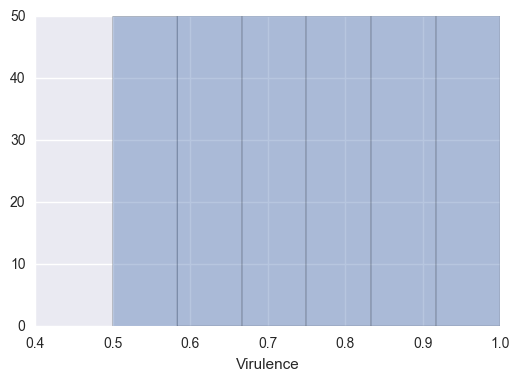

In [13]:
import seaborn as sns

sns.distplot(df['Virulence'].dropna(), kde=False)

Ploting the histogram shows that there are only six distinct values in the column of Virulence.

In [14]:
treatment1 = df[df['Virulence'] == 0.7]["ShannonDiversity"]
treatment2 = df[df['Virulence'] == 0.8]["ShannonDiversity"]
treatment3 = df[df['Virulence'] == 0.9]["ShannonDiversity"]

Virulence is considered as a factor and each level of Virulence is considered as a treatment. Here we choose 0.7, 0.8, and 0.9 as three treatments.

In [56]:
# Prepare the subset data as a pandas DataFrame

anova_df = pd.concat([pd.DataFrame({'ShannonDiversity': treatment1.values, 
                                    'level': ['trt1']*len(treatment1)}),
                      pd.DataFrame({'ShannonDiversity': treatment2.values, 
                                    'level': ['trt2']*len(treatment2)}),
                      pd.DataFrame({'ShannonDiversity': treatment3.values, 
                                    'level': ['trt3']*len(treatment3)})])


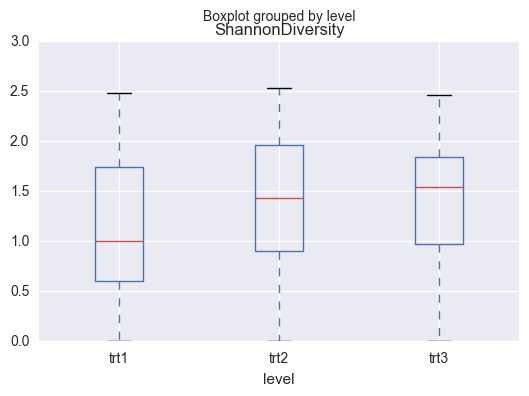

In [57]:
# Create boxplots for each treatment

anova_df.boxplot('ShannonDiversity', by='level')

Judging by the Boxplot, there is not much difference in the means of ShannonDiversity for the three treatments.

In [58]:
# Compute One-way ANOVA p-value

from scipy import stats

fval, pval = stats.f_oneway(treatment1, treatment2, treatment3)
print "One-way ANOVA P =", pval

One-way ANOVA P = 0.381509481874


If p-value > 0.05, we can claim with high confidence that the means of the ShannonDiversity from the three treatments are not significantly different.

In [64]:
# Degrees of Freedom
r = len(pd.unique(anova_df.level))  # number of treatments
N = len(anova_df.values)  # total sample size
n = anova_df.groupby('level').size()[0]  # sample size in each treatment (equal size)

In [65]:
DFbetween = r - 1
DFwithin = N - r
DFtotal = N - 1

In [68]:
# Calculate different Sum of Squares
m1 = treatment1.mean()
m2 = treatment2.mean()
m3 = treatment3.mean()
m = anova_df.ShannonDiversity.mean()

In [85]:
import numpy as np

SSTR = n*(m1 - m)**2 + n*(m2 - m)**2 + n*(m3 - m)**2
SSE = sum((anova_df['ShannonDiversity'] - np.repeat([m1, m2, m3], n))**2)
SSTO = sum((anova_df['ShannonDiversity'] - m)**2)

print "SSTO = %.04f" % SST
print "SSE = %.04f" % SSE
print "SSTR = %.04f" % SSTR

SSTO = 80.6539
SSE = 79.6034
SSTR = 1.0505


In [86]:
# Calcualte Mean Sum of Squares

MSTR = SSTR / DFbetween
MSE = SSE / DFwithin
MSTO = SSTO / DFtotal

In [92]:
# Calculate the F-test statistic
F = MSTR / MSE
F

0.96996402324598718

In [93]:
pval = stats.f.sf(F, DFbetween, DFwithin)
pval

0.38150948187409939

In [96]:
# Calculate effect size (perctage of the total variance explained by model)

eta_sqrd = SSTR / SSTO
eta_sqrd

0.013024902535782201

In [98]:
om_sqrd = (SSTR - (DFbetween * MSE))/(SSTO + MSE)
om_sqrd

-0.00040064013829190924